# Start of project :
## “De gezondheidszorg”

1 Get the data and import the necessary librairies.


In [1]:
# ... import the relevant librairies

import numpy as np
import requests
import pandas as pd
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
import matplotlib.pyplot as plt

In [2]:
# ... go to terminal :  ../rest_server/ 
# ... run ./start_rest_server.sh

# ... download from the API with request.get

In [3]:


response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1') 

# ... change the response into dictionairy structured as a .json this does also check if the structure is suitable for a .json

raw_data = response.json()



# ... create a pandas dataframe named df

df = pd.DataFrame.from_dict(raw_data['data']) 
# print(type(download))
# print(type(raw_data))
# display(raw_data)
# display(df)

In [4]:
df.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


*Run this to save the dataframe as .csv*

In [5]:
# ... safe the df as a .csv were the delimiter is a semi colon. 

# df.to_csv('../edited_files/raw_data.csv', index=False,sep=';')






2 Some data checks to see what type of data the we have put into the df

In [6]:
# check what type of data is in the 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


In [7]:
# wat statistische data van de df

df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [8]:
# ... check the number of duplicated rows:
# ... The excpected result is (0, 8) zero duplicated rows of 8 columns. 
# ... check if this is the case:

duplicate_rows_df = df[df.duplicated()]
print ("Number of duplicate rows: ", duplicate_rows_df.shape)

if duplicate_rows_df.shape == (0, 8):
    print ('There are no unexcpected duplicates')
else:
    print ('There are unexcpected duplicates please look at the data')


Number of duplicate rows:  (0, 8)
There are no unexcpected duplicates


In [9]:
# ...a posibility to remove duplicate rows from the dataset 
# ... this might be an option to use if there are duplicates that need not be in the dataset. it probably is not needed.   

# df_remove_duplicate = df = df.drop_duplicates()
# df_remove_duplicate.head()

# df.info()
# print()
# df_remove_duplicate.info()

In [10]:
# any missing values? 

print(df.isnull().sum())

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
lifespan    0
dtype: int64


In [11]:
# why is it missing? is it random?
# impute or delete?

# impute is erg lastig. het past namelijk dingen sals standaard deviatie, etc aan. 

In [12]:
# kijk met isna welke values NaN zijn. met any waar isna true is en selecteer die met loc
df_contains_NaN = df.loc[df.isna().any(axis=1)]

# print het resultaat
print(df_contains_NaN)

      genetic  length  mass  exercise  smoking  alcohol  sugar  lifespan
1421     81.0   188.0  91.0       NaN      0.0     10.0      4        65
1631     80.0     NaN  90.0       2.0      7.0      7.0      3        74
2146     80.0   169.0  73.0       1.0      1.0      NaN      4        70
2519     80.0   181.0  89.0       2.0      NaN      9.0      2        79
2556     79.0     NaN  75.0       2.0      0.0      6.0      3        82
3433     78.0   176.0   NaN       3.0      3.0      3.0      4        89
4095      NaN   177.0  70.0       1.0     22.0      7.0      2        70


In [13]:
df = df.dropna(axis = 0)
df.head()
print()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8185 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8185 non-null   float64
 1   length    8185 non-null   float64
 2   mass      8185 non-null   float64
 3   exercise  8185 non-null   float64
 4   smoking   8185 non-null   float64
 5   alcohol   8185 non-null   float64
 6   sugar     8185 non-null   int64  
 7   lifespan  8185 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 575.5 KB


<AxesSubplot: xlabel='lifespan'>

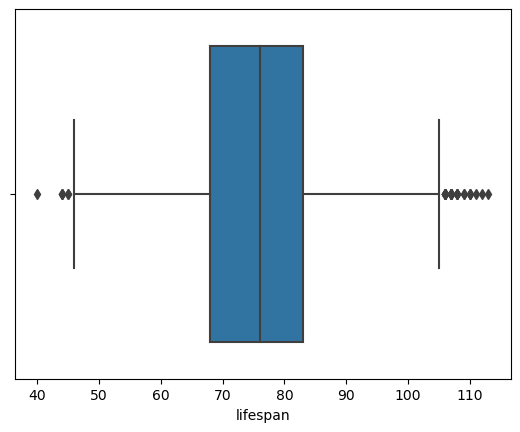

In [14]:
# got any outliers?
sns.boxplot(x=df['lifespan'])

#... alles buiten de lijnen is een outlier. 


In [15]:
# calling head() method  
# storing in new variable 
# list(data) or
list(df.columns)

def check():
  for x in list:
    return(x)

sns.boxplot(x=check(list))

# x = lambda x: (for i in x : return i)

# sns.boxplot(x=df['lifespan'])

TypeError: check() takes 0 positional arguments but 1 was given

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print ()
print (Q3)
print ()
print (IQR)

# gooi het allemaal maar weg als het zo is. 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 +1.5*IQR))).any(axis=1)]

genetic      79.0
length      174.0
mass         70.0
exercise      1.0
smoking       3.0
alcohol       4.0
sugar         2.0
lifespan     68.0
Name: 0.25, dtype: float64

genetic      81.0
length      193.0
mass         88.0
exercise      2.0
smoking      16.0
alcohol       8.0
sugar         3.0
lifespan     83.0
Name: 0.75, dtype: float64

genetic      2.0
length      19.0
mass        18.0
exercise     1.0
smoking     13.0
alcohol      4.0
sugar        1.0
lifespan    15.0
dtype: float64


<AxesSubplot: >

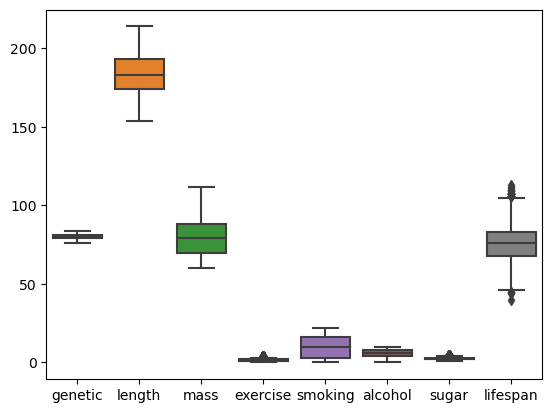

In [ ]:
# got any outliers?

sns.boxplot(data=df)
#... alles buiten de lijnen is een outlier. 


<AxesSubplot: xlabel='sugar'>

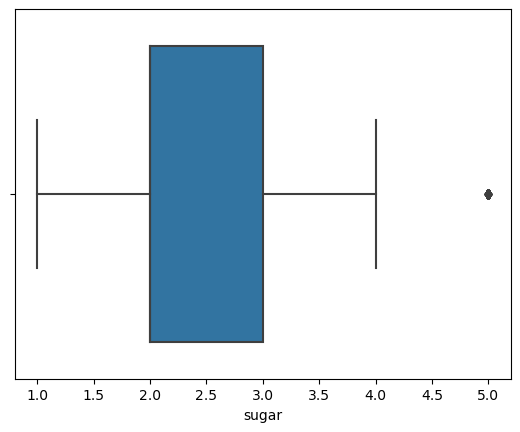

In [ ]:
# outliers check per categorie


# sns.boxplot(x=df['genetic'])
# sns.boxplot(x=df['length'])
# sns.boxplot(x=df['mass'])
# sns.boxplot(x=df['exercise'])
# sns.boxplot(x=df['smoking'])
# sns.boxplot(x=df['alcohol'])
# sns.boxplot(x=df['sugar'])
# sns.boxplot(x=df['lifespan'])


In [ ]:
# uit EDA van docent geen idee wat ik hier nu aan heb. 

# df.lifespan.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
# plt.title("smokeing age")
# plt.ylabel('smoking')
# plt.xlabel('lifespan');

In [ ]:
# ... maak een column bmi en een column bmi_category om te kijken of dat impact heeft.  

df['bmi'] = df['mass']/(df['length']/100)**2
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114


In [ ]:

# ... de bmi_category met een loop

# def bmi_category(bmi):
#     if bmi > 40:
#         return 'obese_3'
#     elif bmi > 35:
#         return 'obese_2'
#     elif bmi > 30:
#         return 'obese_1'
#     elif bmi > 25:
#         return 'over_weight'
#     elif bmi >= 18.5:
#         return 'normal_weight'
#     else:
#         return 'under_weight'

# df_bmi = df
# df_bmi['bmi_category'] = df['bmi'].apply(lambda x: bmi_category(x))


In [ ]:
# ... een bmi_categorie met de 8 officiele categoerieën 

df_bmi = df.copy()
bmi_groups = [0, 16,17, 18.5, 25, 30,35,40,np.inf]
df_bmi['bmi_category']= pd.cut(df['bmi'], bins=bmi_groups, labels=['severe_thinness','moderate_thinness','mild_thinness','normal_weight','over_weight','obese_1','obese_2','obese_3'] )

df.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_category
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114,over_weight


In [ ]:
# ... maak een column van de 3 officiele kleinere bmi groepen .  

bmi_narrow_groups = [0, 18.5, 25,np.inf]
df_bmi['bmi_narrow']= pd.cut(df['bmi'], bins=bmi_narrow_groups, labels=['under_weight','normal_weight','over_weight'] )
df_bmi.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_category,bmi_narrow
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778,over_weight,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083,normal_weight,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802,normal_weight,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471,normal_weight,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114,over_weight,over_weight


In [ ]:
df.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_category,bmi_narrow
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.777778,over_weight,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.983083,normal_weight,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.441802,normal_weight,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.305471,normal_weight,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.451114,over_weight,over_weight


<AxesSubplot: xlabel='bmi_category', ylabel='lifespan'>

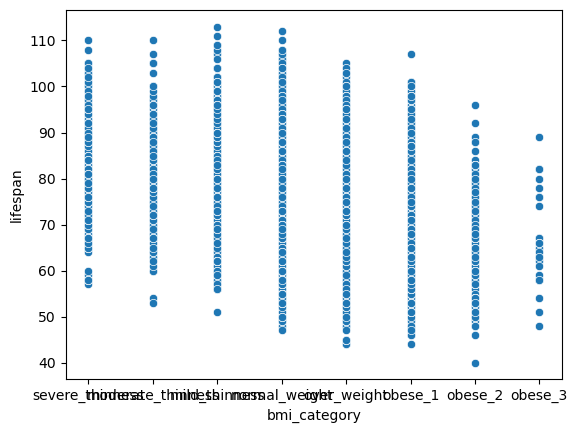

In [ ]:
sns.scatterplot(df_bmi,x='bmi_category',y='lifespan')

<AxesSubplot: xlabel='bmi', ylabel='lifespan'>

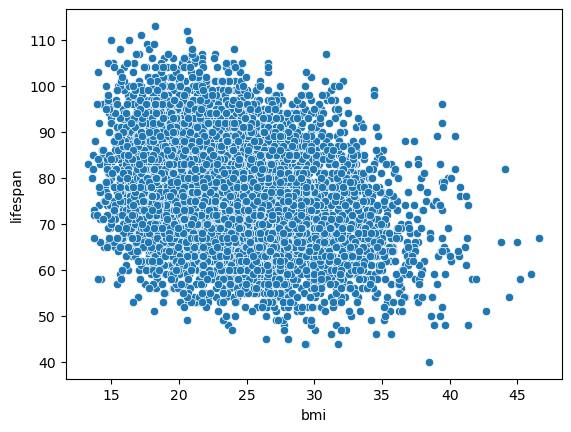

In [ ]:
sns.scatterplot(df_bmi,x='bmi',y='lifespan')

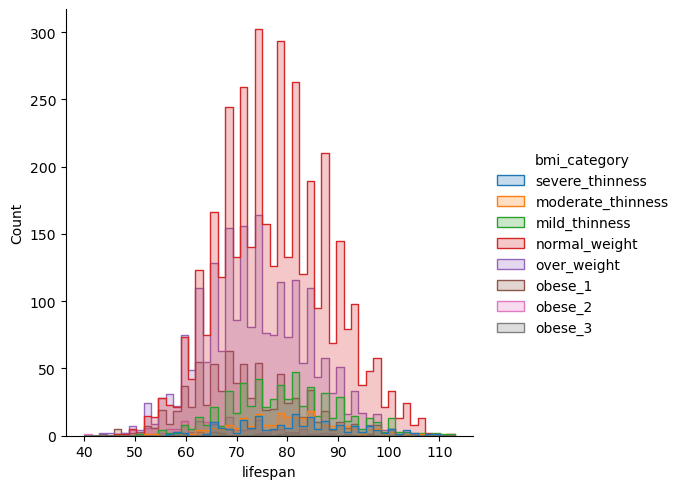

In [ ]:
sns.displot(df_bmi, x="lifespan", hue="bmi_category", element="step")

/var/folders/z7/znrzj1td0gl1pgl5mkk5l0h00000gn/T/ipykernel_1552/2736090008.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

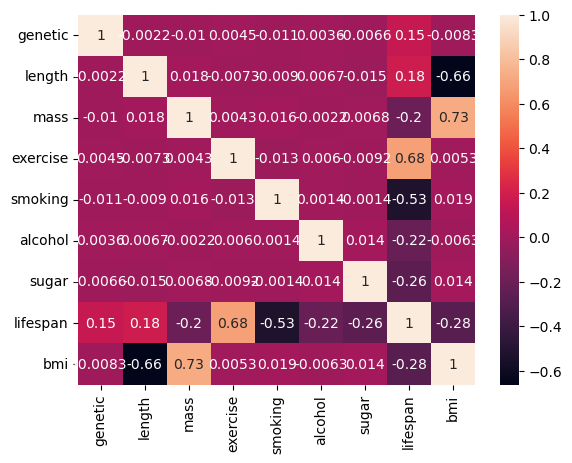

In [ ]:
# ... create a heatmap to see what the correlations between the columns are. 



sns.heatmap(df.corr(), annot=True)


In [ ]:
df_bmi_range.dtypes

lifespan           int64
bmi_category    category
bmi              float64
dtype: object

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df_bmi_range

# Compute mean lifespan for each BMI category
mean_lifespan = df_bmi.groupby('bmi_category')['lifespan'].mean()

# Compute median lifespan for each BMI category
median_lifespan = df_bmi.groupby('bmi_category')['lifespan'].median()

# Print out the results
print('Mean lifespan by BMI category:\n', mean_lifespan)
print('\nMedian lifespan by BMI category:\n', median_lifespan)


Mean lifespan by BMI category:
 bmi_category
severe_thinness      81.885417
moderate_thinness    80.199115
mild_thinness        79.624390
normal_weight        77.606814
over_weight          73.761111
obese_1              71.654040
obese_2              66.467532
obese_3              66.680000
Name: lifespan, dtype: float64

Median lifespan by BMI category:
 bmi_category
severe_thinness      82.0
moderate_thinness    80.0
mild_thinness        79.0
normal_weight        77.0
over_weight          73.0
obese_1              71.0
obese_2              66.0
obese_3              65.0
Name: lifespan, dtype: float64


In [ ]:
df_agg=df_bmi.groupby('bmi_category')['lifespan'].describe()

print(df_agg)

                    count       mean        std   min    25%   50%    75%  \
bmi_category                                                                
severe_thinness     192.0  81.885417  11.308496  57.0  73.75  82.0  89.25   
moderate_thinness   226.0  80.199115  10.135973  53.0  73.00  80.0  86.00   
mild_thinness       615.0  79.624390  10.592560  51.0  72.00  79.0  87.00   
normal_weight      4021.0  77.606814  10.628664  47.0  70.00  77.0  85.00   
over_weight        2160.0  73.761111  10.301673  44.0  66.00  73.0  81.00   
obese_1             792.0  71.654040  10.443104  44.0  64.00  71.0  78.00   
obese_2             154.0  66.467532  10.368485  40.0  59.00  66.0  74.00   
obese_3              25.0  66.680000  10.475050  48.0  59.00  65.0  76.00   

                     max  
bmi_category              
severe_thinness    110.0  
moderate_thinness  110.0  
mild_thinness      113.0  
normal_weight      112.0  
over_weight        105.0  
obese_1            107.0  
obese_2      

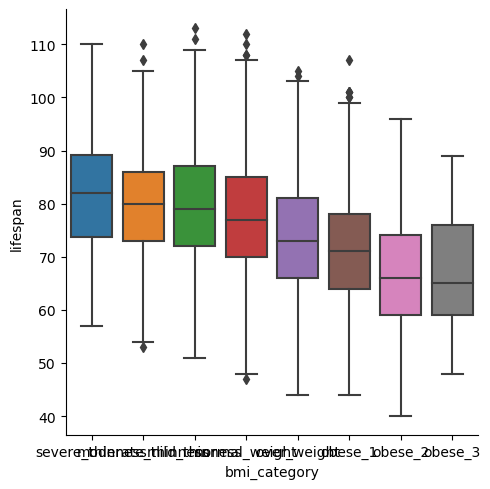

In [ ]:

sns.catplot(data=df_bmi, x="bmi_category", y="lifespan", kind="box")
plt.show()

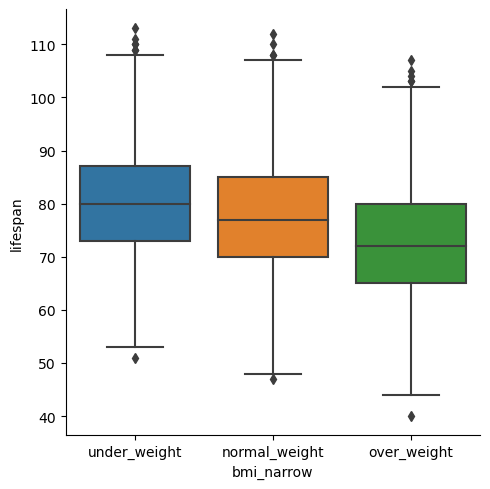

In [ ]:

sns.catplot(data=df_bmi, x="bmi_narrow", y="lifespan", kind="box")
plt.show()

<AxesSubplot: xlabel='bmi_category', ylabel='lifespan'>

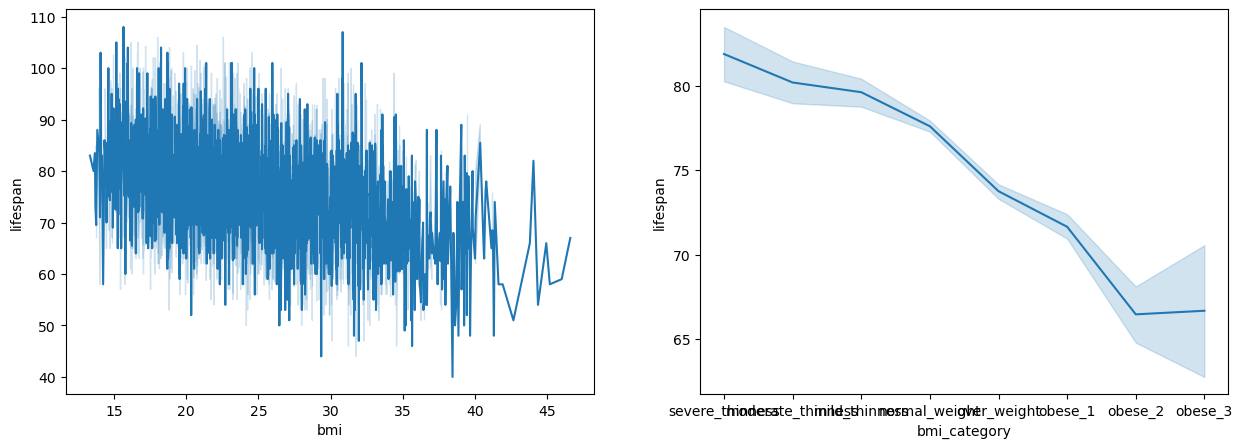

In [ ]:


fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(df,x='bmi', y='lifespan', ax=axes[0])
sns.lineplot(df_bmi,x='bmi_category', y='lifespan', ax=axes[1])

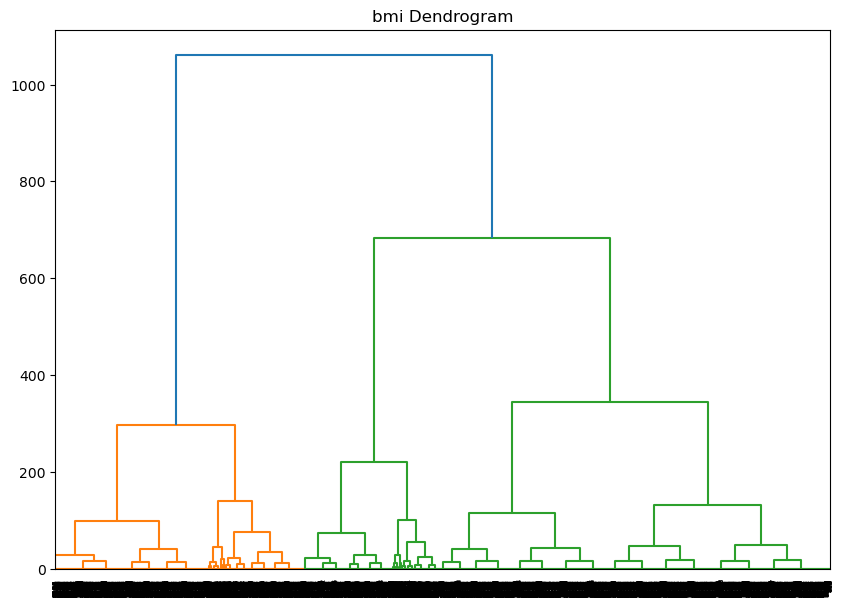

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("bmi Dendrogram")

# Selecting lifespan and bmi by index
selected_data = df.iloc[:, 7:8]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

/Users/stephandekker/miniconda3/envs/miw/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


ValueError: could not convert string to float: 'over_weight'